**Loai Gamal 20180206**

**Ahmed Kardy 20180018**

In [ ]:
from keras.datasets import mnist
import numpy
import PIL
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
TrainingSamples = 10000
TestingSamples = 1000

In [ ]:
def reformatImage(data):
    height = 3
    width = 3
    blocks = []
    for image in range(len(data)):
        image = PIL.Image.fromarray(numpy.uint8(data[image]))
        feature_vector = numpy.array(cropToBlocks(image, height, width))
        blocks.append(feature_vector)
    blocks = numpy.vstack(blocks)
    return blocks

In [ ]:
def cropToBlocks(image, height, width):
    feature_vector = []
    imgWidth, imgHeight = image.size
    for i in range(imgWidth // width):
        for j in range(imgHeight // height):
            box = (j * height, i * width, (j + 1) * height, (i + 1) * width)
            block = image.crop(box)
            block = numpy.asarray(block)
            centre_x, centre_y = calculateCentroid(block, width, height)
            feature_vector.append(centre_x)
            feature_vector.append(centre_y)
    return feature_vector

In [ ]:
def calculateCentroid(block, imageWidth, imageHeight):
    centre_x = 0
    centre_y = 0
    pixels = 0
    for i in range(imageWidth):
        for j in range(imageHeight):
            centre_x = centre_x + i * block[i][j]
            centre_y = centre_y + j * block[i][j]
            pixels = pixels + block[i][j]
    centre_x = centre_x / pixels if pixels > 0 else 0
    centre_y = centre_y / pixels if pixels > 0 else 0
    return centre_x, centre_y

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('train_X: ' + str(train_X.shape))
print('train_Y: ' + str(train_y.shape))
print('test_X:  ' + str(test_X.shape))
print('test_Y:  ' + str(test_y.shape))

11501568/11490434 [==============================] - 0s 0us/step
train_X: (60000, 28, 28)
train_Y: (60000,)
test_X:  (10000, 28, 28)
test_Y:  (10000,)


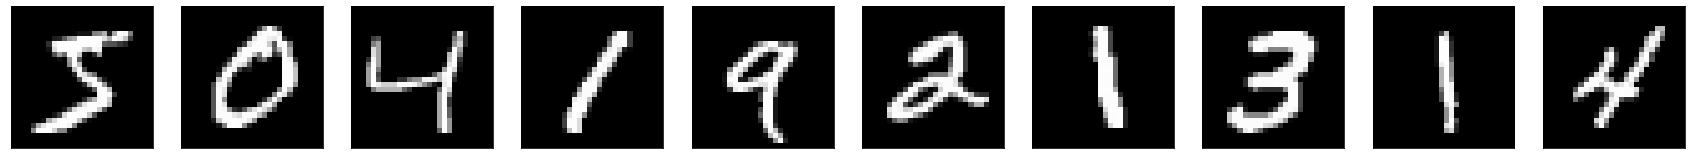

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt
import random

n = 10  # How many digits we will display

plt.figure(figsize=(30, 10))
for i in range(n):
    
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(train_X[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
train_X = reformatImage(train_X[0:TrainingSamples])
test_X = reformatImage(test_X[0:TestingSamples])

train_Y = train_y[0:TrainingSamples]
test_Y = test_y[0:TestingSamples]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_Y)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
score = knn.score(test_X, test_Y)
print("Accuracy = ", score * 100.0, "%")

Accuracy =  85.8 %
